# Agglomerative Hierarchial Clustering

Hierarchical Clustering is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

Agglomerative Hierachial Clustering: It follows bottom-up appraoch. Each observation starts its own cluster and pairs of cluster are merged as one moves up the hierarchy

For merging of different clusters, I am using single linkage i.e., minimizing distance between closet clusters of pair of clusters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [8]:
data = pd.read_csv('Wholesale_customers_data.csv', nrows = 10)
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [3]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
# data_scaled

In [14]:
data = np.array(data_scaled[1:], dtype=np.float)
data.shape

(9, 8)

In [15]:
# # sample data
# X = np.array([[0.40,0.53],
#               [0.22,0.32],
#               [0.35,0.32],
#               [0.26,0.19],
#               [0.08,0.41],
#               [0.35,0.30],
#               [0.80,0.98],
#               [0.28,0.33]
# ])

In [21]:
X = data
X.shape

(9, 8)

In [17]:
# This class makes the distance matrix between the samples elements
class Distance_Matrix(object):
    def __init__(self):
        pass
    
    def compute_distance_matrix(self, data):
        # Creates a matrix of distances between individual samples and clusters attained at a particular step
        dist_matrix = np.zeros((len(data),len(data)))
        for i in range(dist_matrix.shape[0]):
            for j in range(dist_matrix.shape[0]):
                if i!=j:
                    dist_matrix[i,j] = float(self.distance_between_two(data[i],data[j]))
                else:
                    dist_matrix[i,j] = 5**5
        return dist_matrix
    
    def distance_between_two(self,sample1,sample2):
        # this method is used to calculate the distance between two samples that can be cluster or individual element of sample
        # if both are samples then, calculate the distance between them using norm, otherwise it will calculate distance using
        # the next method
        distance = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                try:
                    distance.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
                except:
                    distance.append(self.inter_sample_distance(sample1[i],sample2[j]))
        return min(distance)
    
    def inter_sample_distance(self,s1,s2):
        # this method calculates distance between one sample and one cluster. It takes help of the inter_cluster_distance
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
            
        m = len(s1)
        n = len(s2)
        distance = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        distance.append(self.inter_cluster_distance(s2[i],s1[j]))
                    else:
                        distance.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        distance.append(self.inter_cluster_distance(s1[i],s2[j]))
                    else:
                        distance.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return min(distance)
    
    def inter_cluster_distance(self,cl,sample):
        # this method calculates distance between a sample and a cluster
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return min(dist)

In [18]:
# k is the number of cluters we want to divide the dataset
k = 2
# final_clusters will conatin out list of clusters
final_clusters = []

Now implementing the clustering method and we keep printing the clusters formed after each iteration. I am using single linkage for the implementation of agglomerative clustering

In [19]:
# current_cluster_index will store different cluster at present
cluster_index = [[i] for i in range(X.shape[0])]
initial = [[i] for i in range(X.shape[0])]
# samples will store the data curentlt present
samples = [[list(X[i])] for i in range(X.shape[0])]
m = len(samples)
# distance_matrix will contain the Distance Matrix of the current samples
distance_matrix  = Distance_Matrix()

if k == len(cluster_index):
    final_clusters = initial

while m>1:
    print('Size of the sample before clustering ->',m)
    Dist_matrix = distance_matrix.compute_distance_matrix(samples)
    # index_list_curr contains index list of sample having minimum distance
    index_list_curr = np.where(Dist_matrix==Dist_matrix.min())[0]
    # value_to_add is the sample value added to other value to make a cluster
    value_to_add = samples.pop(index_list_curr[1])
    samples[index_list_curr[0]].append(value_to_add)
    
    print('Sample Node 1 added in cluster ->',cluster_index[index_list_curr[0]])
    print('Sample Node 1 added in cluster ->',cluster_index[index_list_curr[1]])
    
    cluster_index[index_list_curr[0]].append(cluster_index[index_list_curr[1]])
    cluster_index[index_list_curr[0]] = [cluster_index[index_list_curr[0]]]
    v = cluster_index.pop(index_list_curr[1])
    m = len(samples)
        
    print('cluster_index(Current Sample) ->',cluster_index)
    print('Cluster attained in this clustering ->',cluster_index[index_list_curr[0]])
    print('Size of the Sample after Clustering ->',m)
    print('\n')
    if m == k:
        final_clusters = cluster_index
        break


print('No. of clusters to classify the samples ->',k)
print(final_clusters)

Size of the sample before clustering -> 9
Sample Node 1 added in cluster -> [6]
Sample Node 1 added in cluster -> [7]
cluster_index(Current Sample) -> [[0], [1], [2], [3], [4], [5], [[6, [7]]], [8]]
Cluster attained in this clustering -> [[6, [7]]]
Size of the Sample after Clustering -> 8


Size of the sample before clustering -> 8
Sample Node 1 added in cluster -> [0]
Sample Node 1 added in cluster -> [[6, [7]]]
cluster_index(Current Sample) -> [[[0, [[6, [7]]]]], [1], [2], [3], [4], [5], [8]]
Cluster attained in this clustering -> [[0, [[6, [7]]]]]
Size of the Sample after Clustering -> 7


Size of the sample before clustering -> 7
Sample Node 1 added in cluster -> [2]
Sample Node 1 added in cluster -> [3]
cluster_index(Current Sample) -> [[[0, [[6, [7]]]]], [1], [[2, [3]]], [4], [5], [8]]
Cluster attained in this clustering -> [[2, [3]]]
Size of the Sample after Clustering -> 6


Size of the sample before clustering -> 6
Sample Node 1 added in cluster -> [[0, [[6, [7]]]]]
Sample Nod

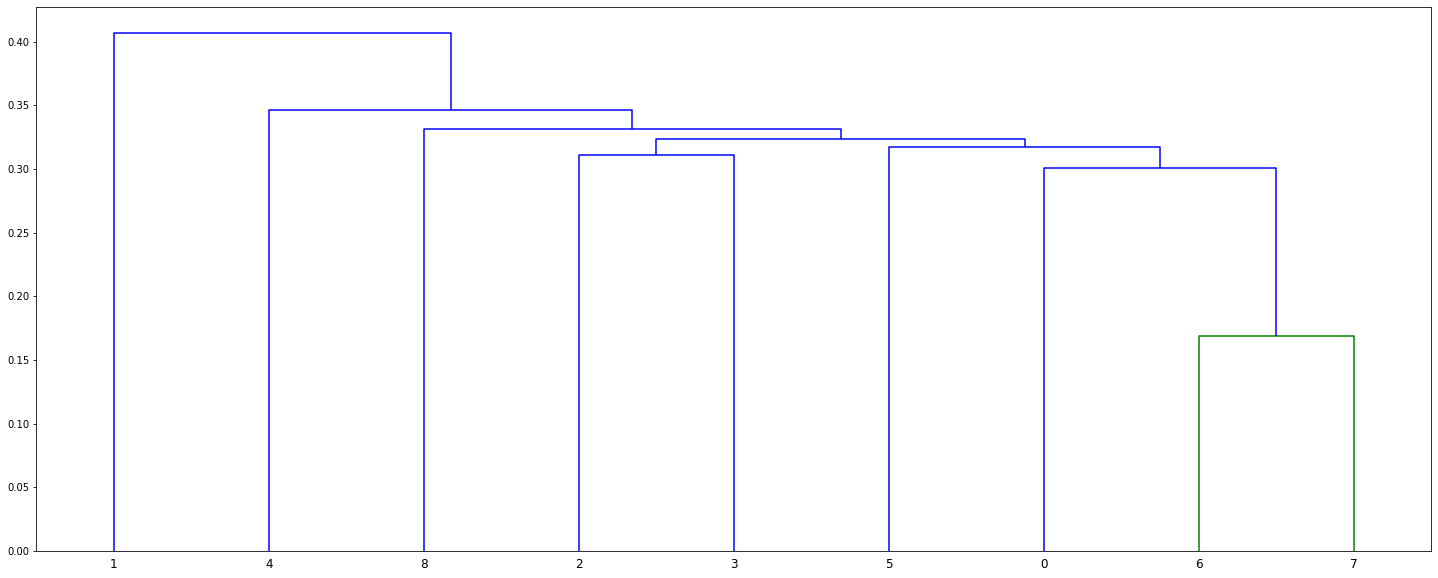

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)